In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import pandas
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn import tree

In [ ]:
import pandas as pd
import io

In [ ]:
df = pd.read_csv('bank.csv')
print(df)

      age            job  marital  education default  balance housing loan  \
0      30     unemployed  married    primary      no     1787      no   no   
1      33       services  married  secondary      no     4789     yes  yes   
2      35     management   single   tertiary      no     1350     yes   no   
3      30     management  married   tertiary      no     1476     yes  yes   
4      59    blue-collar  married  secondary      no        0     yes   no   
...   ...            ...      ...        ...     ...      ...     ...  ...   
4516   33       services  married  secondary      no     -333     yes   no   
4517   57  self-employed  married   tertiary     yes    -3313     yes  yes   
4518   57     technician  married  secondary      no      295      no   no   
4519   28    blue-collar  married  secondary      no     1137      no   no   
4520   44   entrepreneur   single   tertiary      no     1136     yes  yes   

       contact  day month  duration  campaign  pdays  previous 

In [ ]:
df.drop(['job','marital','education','poutcome','default','contact','day','month','duration','campaign','pdays','previous'],axis='columns',inplace=True)

In [ ]:
df.head()

,age,balance,housing,loan,y
0,30,1787,no,no,no
1,33,4789,yes,yes,no
2,35,1350,yes,no,no
3,30,1476,yes,yes,no
4,59,0,yes,no,no


In [ ]:
from pandas.core.internals.base import T
df.loan.replace(('yes','no'),(1,0),inplace=True)
df.housing.replace(('yes','no'),(1,0),inplace=True)

In [ ]:
df.head()

,age,balance,housing,loan,y
0,30,1787,0,0,no
1,33,4789,1,1,no
2,35,1350,1,0,no
3,30,1476,1,1,no
4,59,0,1,0,no


In [ ]:
X = df.values[:, 0:3]
Y = df.values[:, 4]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)

In [ ]:
clf_gini =(X_train, X_test, y_train)

In [ ]:
clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=5)

    # Performing training
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [ ]:
clf_entropy =(X_train, X_test, y_train)

In [ ]:
clf_entropy = DecisionTreeClassifier(
            criterion = "entropy", random_state = 100,
            max_depth = 3, min_samples_leaf = 5)

    # Performing training
clf_entropy.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [ ]:
y_pred = clf_gini.predict(X_test)
print("Predicted values:")
print(y_pred)

Predicted values:
['no' 'no' 'no' ... 'no' 'no' 'no']


In [ ]:
print("Confusion Matrix: ",
        confusion_matrix(y_test, y_pred))

print ("Accuracy : ",
    accuracy_score(y_test,y_pred)*100)

print("Report : ",
    classification_report(y_test, y_pred))

Confusion Matrix:  [[1209    6]
 [ 140    2]]
Accuracy :  89.240972733972
Report :                precision    recall  f1-score   support

          no       0.90      1.00      0.94      1215
         yes       0.25      0.01      0.03       142

    accuracy                           0.89      1357
   macro avg       0.57      0.50      0.48      1357
weighted avg       0.83      0.89      0.85      1357



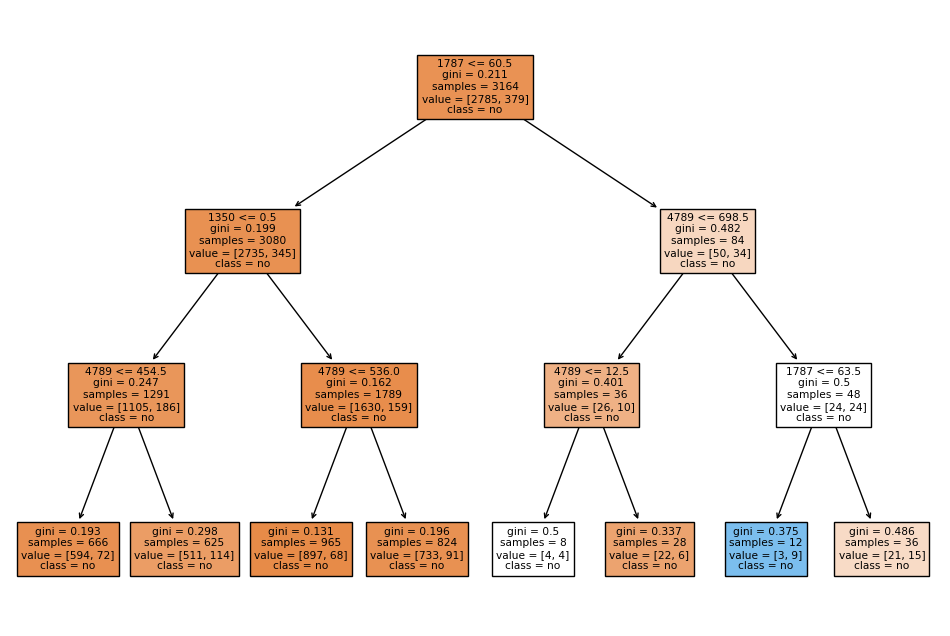

In [ ]:
plt.figure(figsize=(12, 8))
tree.plot_tree(clf_gini, feature_names=df.balance, class_names=df.y, filled=True)
plt.show()

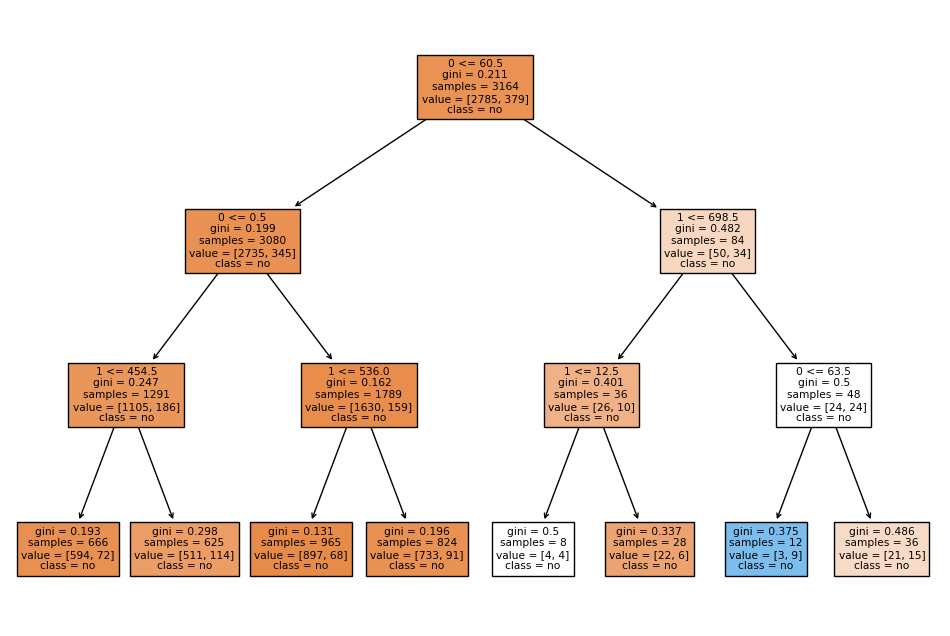

In [ ]:
plt.figure(figsize=(12, 8))
tree.plot_tree(clf_gini, feature_names=df.loan, class_names=df.y, filled=True)
plt.show()

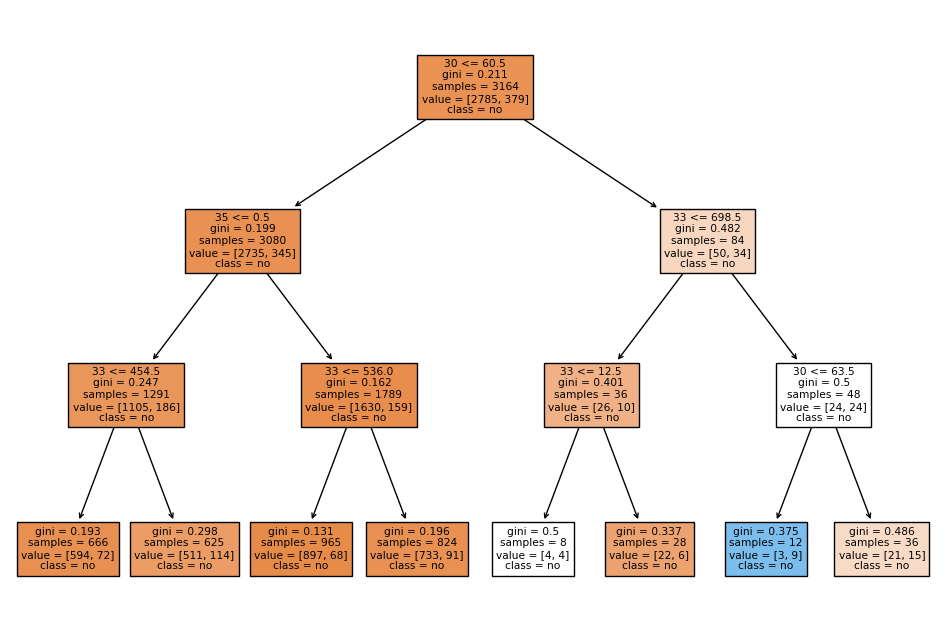

In [ ]:
plt.figure(figsize=(12, 8))
tree.plot_tree(clf_gini, feature_names=df.age, class_names=df.y, filled=True)
plt.show()